In [2]:
import numpy as np

# true values loaded (ASSUME THIS IS HIDDEN TO YOU)
true_values = np.genfromtxt('true_values.csv', delimiter=',')
true_values = np.expand_dims(true_values, axis=1)
print(type(true_values))
print(true_values.shape)

<class 'numpy.ndarray'>
(21283, 1)


In [3]:
def score(pred_vals):
    """Function returning the error of model
    ASSUME THIS IS HIDDEN TO YOU"""
    num_preds = len(pred_vals)
    num_true_vals = len(true_values)
    val = np.sqrt(np.sum(np.square(np.log2((true_values+1)/(pred_vals+1))))/num_true_vals)
    return round(val, ndigits=5)

In [4]:
def weak_learner(input_value,score_function,bin = 20):
    new_value = np.copy(input_value)
    input_len = len(input_value)
    new_rand = np.random.randint(0, 2, bin).reshape((bin,1)) #generator
    change_index = np.random.choice(N, bin, replace = False)
    #change_index = np.floor(np.random.sample(bin)*N).astype(int)
    new_value[change_index] = new_rand
    old_score = score_function(input_value)
    new_score = score_function(new_value)
    if (old_score<=new_score):
        return input_value
    else:
        return new_value

In [5]:
def boosting(ini_value,score_function,iter=40000):
    for i in range(iter):
        ini_value = weak_learner(ini_value,score)

In [6]:
from matplotlib import pyplot as plt

np.random.seed(5525)
N =  21283
ini_value = np.random.randint(0, 2, N)
ini_value = np.expand_dims(ini_value, axis=1) #change it to a vector
score_list = []
for i in range(40000):
    ini_value = weak_learner(ini_value,score)
    score_value = score(ini_value)
    score_list.append(score_value)

<Figure size 1600x1000 with 1 Axes>

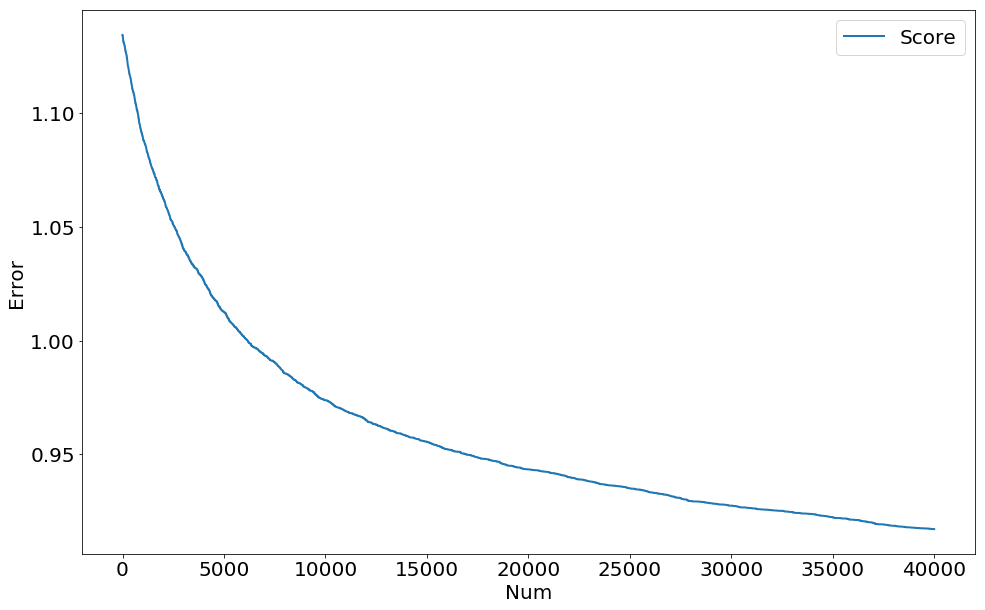

In [8]:
plt.figure(figsize=(16,10))
plt.plot(score_list, marker='', linewidth = 2, linestyle='-', label = 'Score')
plt.legend(fontsize=20)
plt.xlabel('Num', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize = 20)
plt.show()